# Questions to answer


##### `basic_info` column ✅

- What is the most popular recipes category (most repeated)? ✅
- What is the avarage reviews/ratings? ✅ 
- What is the avarage reviews/rating count per category? ✅
- What is the avarage distribution of reviews/rating? ✅
- What is the most popular recipe provider (Recipe by "...") ✅
- Which state has more avarage number of reivews? ✅
- What most reviewed dish each state have? ✅

##### `prep_data` column ✅

- Avarage prep/cook/total time? ✅
- Avarage prep/cook/total time per category? ✅
- Which category has the most avarage servings per meal? ✅
- What is an avarage Prep/Cook time per State? ✅
- What is an avarage Servings per State? ✅

##### `ingridients` column ⛔

- What is the most common ingidients across all recipes? Top 3-5-10 ingidients. ⛔
- What is the most common ingidient(s) by State? ⛔

Didn't managed to finish with this column due to the lack of time with this project.

The issue with that is I didn't manage to extract food/beverage names from the string as there are just too many of them.

I haven't found any Python package that can identify food/beverages (thought to create one 🙂). I've started creating regular expressions but this would take just too much time to finish.

##### `nutritions` column ✅

- Avarage of Calories/Fat/Carbs/Protein/etc?✅
- Which category has the biggest of Calories/Fat/Carbs/Protein/etc?✅
- Which state has the biggest of Calories/Fat/Carbs/Protein/etc? ✅
- Which title (meal) has the biggest of Calories/Fat/Carbs/Protein/etc? ✅

##### Other questions ✅

- Correlation between number of servings and number of reviews. ✅
- Correlation between total time and number of reviews. ✅
- Correlation between calories and number of reviews. ✅
- Correlation between total cook time and number of servings. ✅
- Correlation between servings and calories. ✅

## Key Project Takeaways

1. Desserts category is the most popular.
2. Avarage recipe Rating: 4, Reviews: 132.
3. Category with the higher number of reviews is 'Bread': 7722 reviews.
4. Arizona has higher avarage reviews: 418.
5. Most reviewed dish
6. Avarage cook time (preparation and cooking itself) is around 183.4 miuntes.
    - Italian, Pork and Everyday cooking categories has the longest total cook time.
7. Top categories with avarage highest servings: Cookies, Sauces and condiments, Everyday cooking.
8. Wayoming has the longest avarage cook time: 159 min.
9. Illinoins has the highest calories.
10. Highest nutritions per category:
    - Calories: Everyday Cooking (2057g)
    - Fat: Meat and Poultry (170g)
    - Carbs: Mini Foods (177g)
    - Protein: Seafood (118g)

In [1]:
# %pip install pandas matplotlib seaborn plotly

%matplotlib inline

import pandas as pd
import matplotlib as plt

In [2]:
recipes = pd.read_json('/workspace/us-recipes-analysis-by-state/data/complete-recipes-list.json', orient='records')
recipes.head()

,state,basic_info,prep_data,ingridients,nutritions
0,Texas,"{'title': 'Slow Cooker Texas Pulled Pork', 'ca...","{'prep_time:': '15 mins', 'cook_time:': '5 hrs...","[1 teaspoon vegetable oil, 1 (4 pound) pork sh...","{'calories': '528', 'fat': '23g', 'carbs': '46..."
1,Texas,"{'title': 'Brazilian Grilled Pineapple', 'cate...","{'prep_time:': '10 mins', 'cook_time:': '10 mi...","[1 cup brown sugar, 2 teaspoons ground cinnamo...","{'calories': '255', 'fat': '0g', 'carbs': '66g..."
2,Texas,"{'title': 'Cowboy Caviar', 'category': 'Appeti...","{'prep_time:': '15 mins', 'additional_time:': ...","[1 (15.5 ounce) can black beans, drained, 1 (1...","{'calories': '233', 'fat': '9g', 'carbs': '32g..."
3,Texas,"{'title': 'Soul Smothered Chicken', 'category'...","{'prep_time:': '15 mins', 'cook_time:': '1 hrs...","[½ cup butter, 1 whole chicken, cut into piece...","{'calories': '372', 'fat': '23g', 'carbs': '22..."
4,Texas,{'title': 'Slow Cooker Texas Smoked Beef Brisk...,"{'prep_time:': '10 mins', 'cook_time:': '6 hrs...","[3 tablespoons smoked paprika, 2 tablespoons g...","{'calories': '342', 'fat': '16g', 'carbs': '29..."


In [3]:
recipes.shape

(1798, 5)

In [4]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1798 entries, 0 to 1797
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   state        1798 non-null   object
 1   basic_info   1798 non-null   object
 2   prep_data    1798 non-null   object
 3   ingridients  1798 non-null   object
 4   nutritions   1798 non-null   object
dtypes: object(5)
memory usage: 70.4+ KB


In [5]:
recipes.sample(6)

,state,basic_info,prep_data,ingridients,nutritions
1512,South Carolina,{'title': '8 Soups and Stews That Are Full of ...,{},[],{}
117,Colorado,"{'title': 'Chile Colorado II', 'category': 'Cu...","{'prep_time:': '20 mins', 'cook_time:': '3 hrs...","[2 tablespoons vegetable oil for browning, 5 p...","{'calories': '755', 'fat': '48g', 'carbs': '28..."
678,Louisiana,"{'title': 'Cajun Pastalaya', 'category': 'Main...","{'prep_time:': '45 mins', 'cook_time:': '45 mi...","[2 tablespoons butter, 1 pound andouille sausa...","{'calories': '640', 'fat': '32g', 'carbs': '54..."
1453,New Jersey,{'title': 'Best Tuna Melt (New Jersey Diner St...,"{'prep_time:': '10 mins', 'cook_time:': '5 min...","[2 (5 ounce) cans tuna, drained, ¼ cup mayonna...","{'calories': '484', 'fat': '28g', 'carbs': '22..."
369,Washington,{'title': 'Art's Southern-Style Chocolate Grav...,"{'prep_time:': '5 mins', 'cook_time:': '10 min...","[2 ⅔ tablespoons butter, 2 tablespoons all-pur...","{'calories': '201', 'fat': '8g', 'carbs': '31g..."
926,Massachusetts,"{'title': 'Boston Cream Pie', 'category': 'Des...","{'prep_time:': '45 mins', 'cook_time:': '35 mi...","[1 ¼ cups all-purpose flour, 1 cup white sugar...","{'calories': '318', 'fat': '13g', 'carbs': '47..."


This section is to answer following questions from the `basic_info` column.

In [6]:
import re

basic_info_subset = recipes['basic_info']
basic_info_subset.to_frame()

basic_info_subset_df = []

#TODO: add state
for result in basic_info_subset:
    try:
        rating = float(result['rating'].replace('\n', ''))
    except: rating = 0
        
    try:
        rating_count = int(re.search(r'(\d{1,3}(,\d{3})*)', result['rating_count'].replace(',', '')).group(0))
    except: rating_count = 0
    
    try:
        reviews = int(re.search(r'\d+', result['reviews'].replace(',', '')).group())
    except: reviews = 0
    
    basic_info_subset_df.append({
        'title': result['title'],
        'category': result['category'],
        'rating': rating,
        'rating_count': rating_count,
        'reviews': reviews,
        'recipe_by': result['recipe_by']
    })

Getting basic info about the DataFrame

In [7]:
basic_info_subset_standartized_df = pd.DataFrame(data=basic_info_subset_df)
basic_info_subset_standartized_df.head()

,title,category,rating,rating_count,reviews,recipe_by
0,Slow Cooker Texas Pulled Pork,Main Dishes,4.5,306,2214,cmccreight
1,Brazilian Grilled Pineapple,Side Dish,4.9,92,68,SoccerNut
2,Cowboy Caviar,Appetizers and Snacks,4.7,267,193,Cooknik
3,Soul Smothered Chicken,Meat and Poultry,4.7,471,375,Veronica Rockett
4,Slow Cooker Texas Smoked Beef Brisket,Main Dishes,4.3,103,81,Sandy Clark Gerhardt


Contactinate with `state` column

In [8]:
state_df = recipes['state']

basic_info_subset_standartized = pd.concat([state_df, basic_info_subset_standartized_df], axis=1, sort=False)
basic_info_subset_standartized.head()

,state,title,category,rating,rating_count,reviews,recipe_by
0,Texas,Slow Cooker Texas Pulled Pork,Main Dishes,4.5,306,2214,cmccreight
1,Texas,Brazilian Grilled Pineapple,Side Dish,4.9,92,68,SoccerNut
2,Texas,Cowboy Caviar,Appetizers and Snacks,4.7,267,193,Cooknik
3,Texas,Soul Smothered Chicken,Meat and Poultry,4.7,471,375,Veronica Rockett
4,Texas,Slow Cooker Texas Smoked Beef Brisket,Main Dishes,4.3,103,81,Sandy Clark Gerhardt


In [9]:
basic_info_subset_standartized.describe()

,rating,rating_count,reviews
count,1798.000000,1798.000000,1798.000000
mean,4.294549,113.261402,131.624027
std,0.888674,161.339443,348.368350
min,0.000000,0.000000,0.000000
25%,4.300000,14.000000,11.000000
50%,4.500000,46.000000,37.000000
75%,4.700000,144.500000,123.000000
max,5.000000,955.000000,7722.000000


In [10]:
basic_info_subset_standartized.shape

(1798, 7)

Simple correlation

<AxesSubplot: >

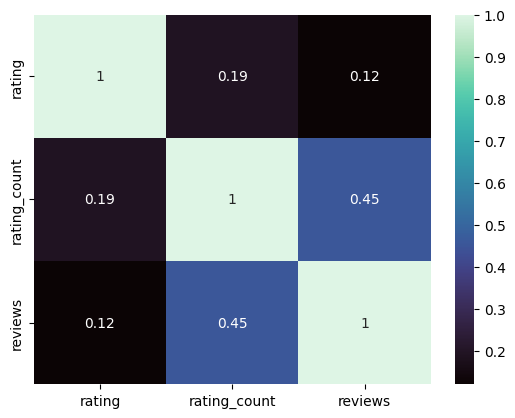

In [11]:
import seaborn as sns

# https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(
    basic_info_subset_standartized.corr(numeric_only=True), annot=True, cmap="mako"
)

#### What is the most popular recipes category (most repeated)? ✅

- Answer: Desserts

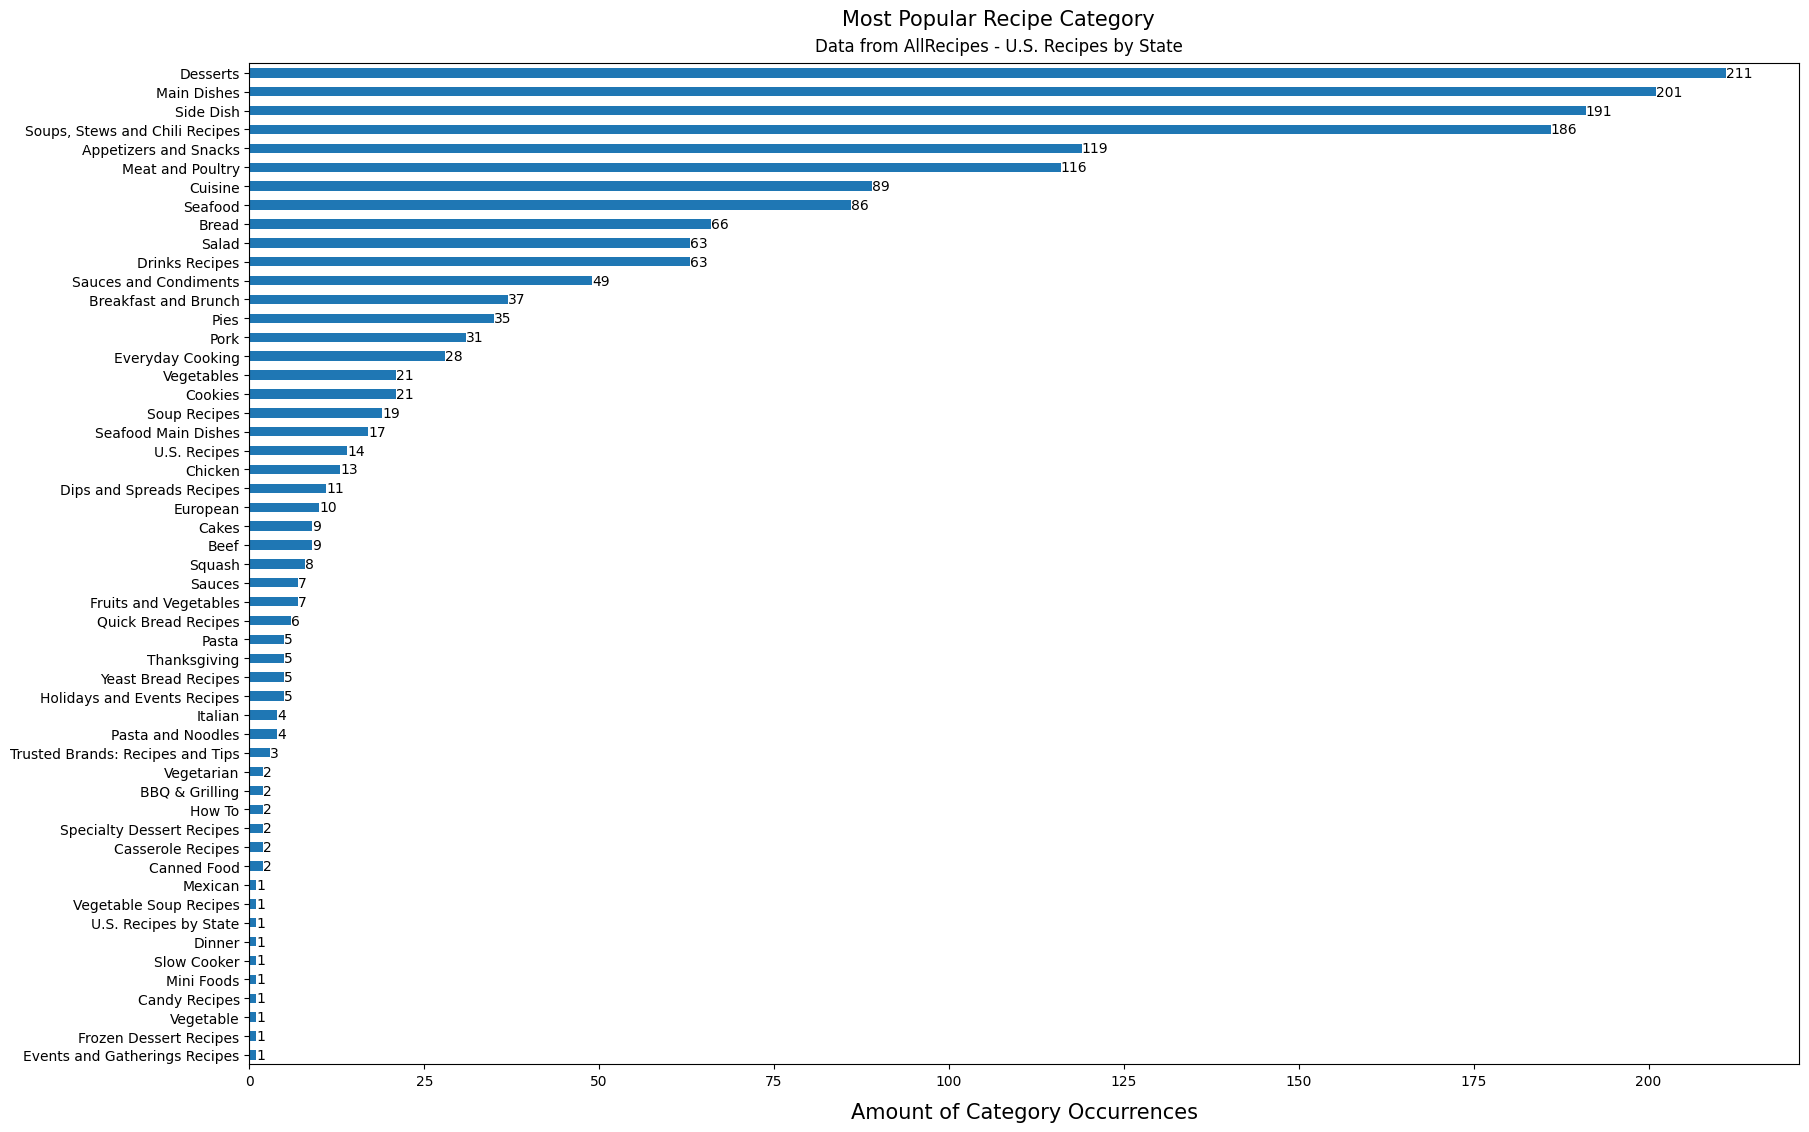

In [12]:
import matplotlib.pyplot as plt

# sort_values(ascending=True) to plot values from high to low
# [::-1] is also to reverse order from high to low

plt.title('Most Popular Recipe Category', y=1.03, x=0.483, fontsize=15)
plt.suptitle('Data from AllRecipes - U.S. Recipes by State', y=0.90)

ax = (
    basic_info_subset_standartized['category']
    .value_counts()
    .sort_values(ascending=True)
    .plot(kind='barh', figsize=(20, 13))
)
ax.bar_label(ax.containers[0])  # bar annotation

plt.xlabel('Amount of Category Occurrences', labelpad=10, fontsize=15)
plt.show()

#### What is the most popular recipe provider (Recipe by "...") ✅

Top 3:
- Chef John
- Allrecipes
- Carol

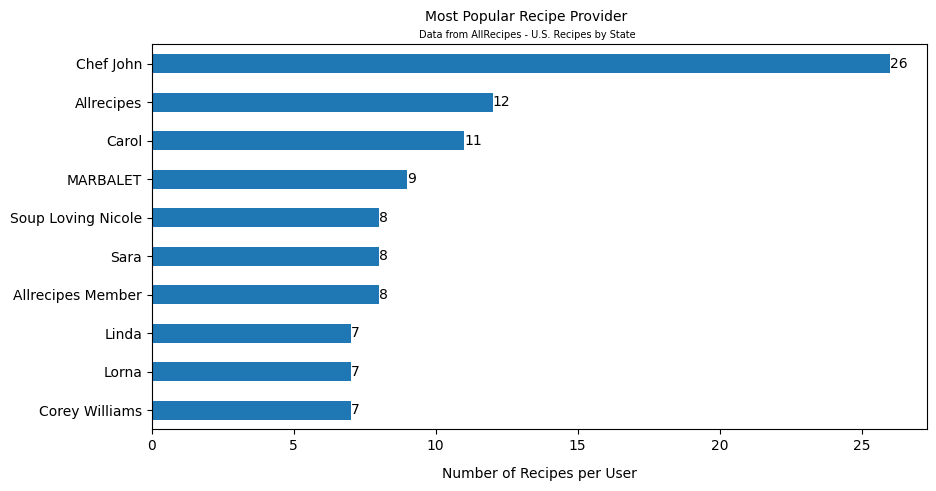

In [13]:
plt.title('Most Popular Recipe Provider', y=1.04, x=0.483, fontsize=10)
plt.suptitle('Data from AllRecipes - U.S. Recipes by State', y=0.91, fontsize=7)

ax = (
    basic_info_subset_standartized['recipe_by']
    .value_counts()[:10]
    .sort_values(ascending=True)
    .plot(kind='barh', figsize=(10, 5))
)
ax.bar_label(ax.containers[0])

plt.xlabel('Number of Recipes per User', labelpad=10, fontsize=10)
plt.show()

#### What is the avarage reviews/ratings? ✅

- Rating: 4
- Reviews: 132

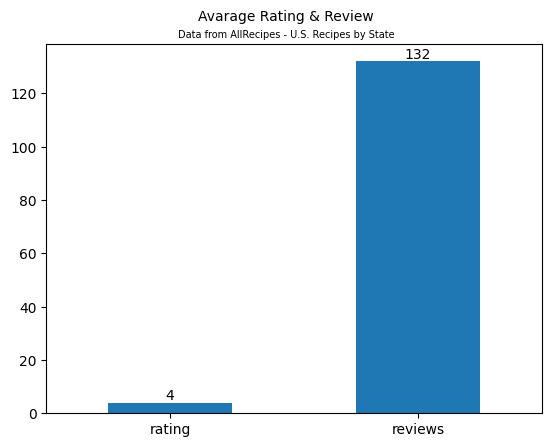

In [14]:
plt.title('Avarage Rating & Review', y=1.04, x=0.483, fontsize=10)
plt.suptitle('Data from AllRecipes - U.S. Recipes by State', y=0.91, fontsize=7)

rating_reviews_subset = basic_info_subset_standartized[['rating', 'reviews']]

ax = rating_reviews_subset.mean().round(0).plot(kind='bar', rot=0)
ax.bar_label(ax.containers[0])

plt.show()

#### Avarage reviews/rating count per category & overal distribution? ✅

- reviews: ~100-200
- rating: ~4.5

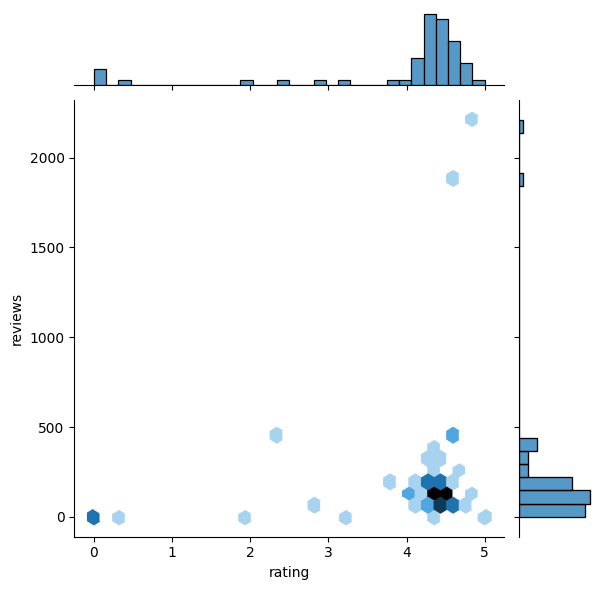

In [15]:
avarage_category_review_rating = basic_info_subset_standartized[['rating', 'reviews', 'category']]

# group by 'category' column and get the mean of rating and reviews
avarage_category_review_rating_grouped = (
    avarage_category_review_rating.groupby('category').mean().round(5)
)

#TODO: add title, suptitle
sns.jointplot(
    data=avarage_category_review_rating_grouped, x='rating', y='reviews', kind='hex'
)

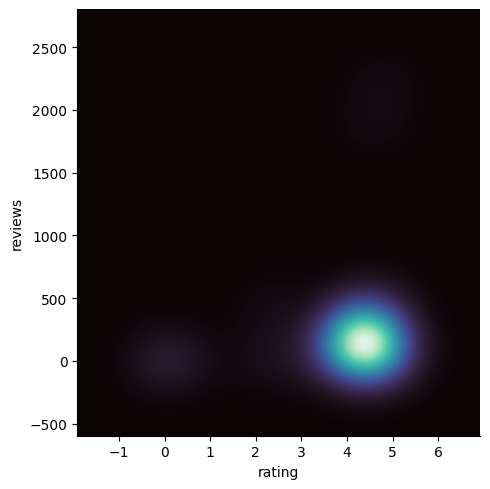

In [16]:
# More pronounced view

#TODO: add title, suptitle
sns.displot(
    avarage_category_review_rating_grouped,
    x='rating',
    y='reviews',
    kind='kde',
    fill=True,
    thresh=0,
    levels=100,
    cmap='mako'
)

#### What is the category(ies) with biggest reviews/rating count? ✅

- Reviews: Bread (7722)
- Rating: multiple categories

In [17]:
avarage_category_review_rating.loc[
    avarage_category_review_rating['reviews'].idxmax(),
    ['category', 'rating', 'reviews'],
]

category    Bread
rating        4.8
reviews      7722
Name: 1330, dtype: object

In [18]:
# another way of finding category with biggest amount of reviews is by using query()
avarage_category_review_rating.query('reviews == reviews.max()')

,rating,reviews,category
1330,4.8,7722,Bread


In [19]:
avarage_category_review_rating.query('rating == rating.max()')

,rating,reviews,category
30,5.0,2,Side Dish
50,5.0,4,Drinks Recipes
64,5.0,12,Cuisine
105,5.0,6,Appetizers and Snacks
110,5.0,1,Cuisine
...,...,...,...
1719,5.0,3,Breakfast and Brunch
1754,5.0,3,Appetizers and Snacks
1767,5.0,10,Meat and Poultry
1784,5.0,1,Side Dish


In [20]:
avarage_category_review_rating.query('rating == rating.max()').sort_values(
    by='reviews', ascending=False
).style.hide(axis='index').background_gradient(cmap='Blues')

rating,reviews,category
5.000000,26,Desserts
5.000000,26,Desserts
5.000000,21,Desserts
5.000000,12,Cuisine
5.000000,10,Meat and Poultry
5.000000,8,Seafood
5.000000,8,Everyday Cooking
5.000000,8,Everyday Cooking
5.000000,8,Sauces and Condiments
5.000000,7,Desserts


Notes

While rating count is maximum of 5, number of reviews is really small. 

The mean value is 3.6 reviews per dish with rating of 5.

Not sure what to do with this info know.

#### Which state has more avarage number of reivews? ✅

Answer: Arizona (avarage of 418 reviews)

Possible further question:

1. Does this mean that there're more users from Arizona and less from North Dakota (state with lowest avarage reviews)?

In [21]:
basic_info_subset_standartized_reviews_state = basic_info_subset_standartized[['state', 'reviews']]
basic_info_subset_standartized_reviews_state.head()

,state,reviews
0,Texas,2214
1,Texas,68
2,Texas,193
3,Texas,375
4,Texas,81


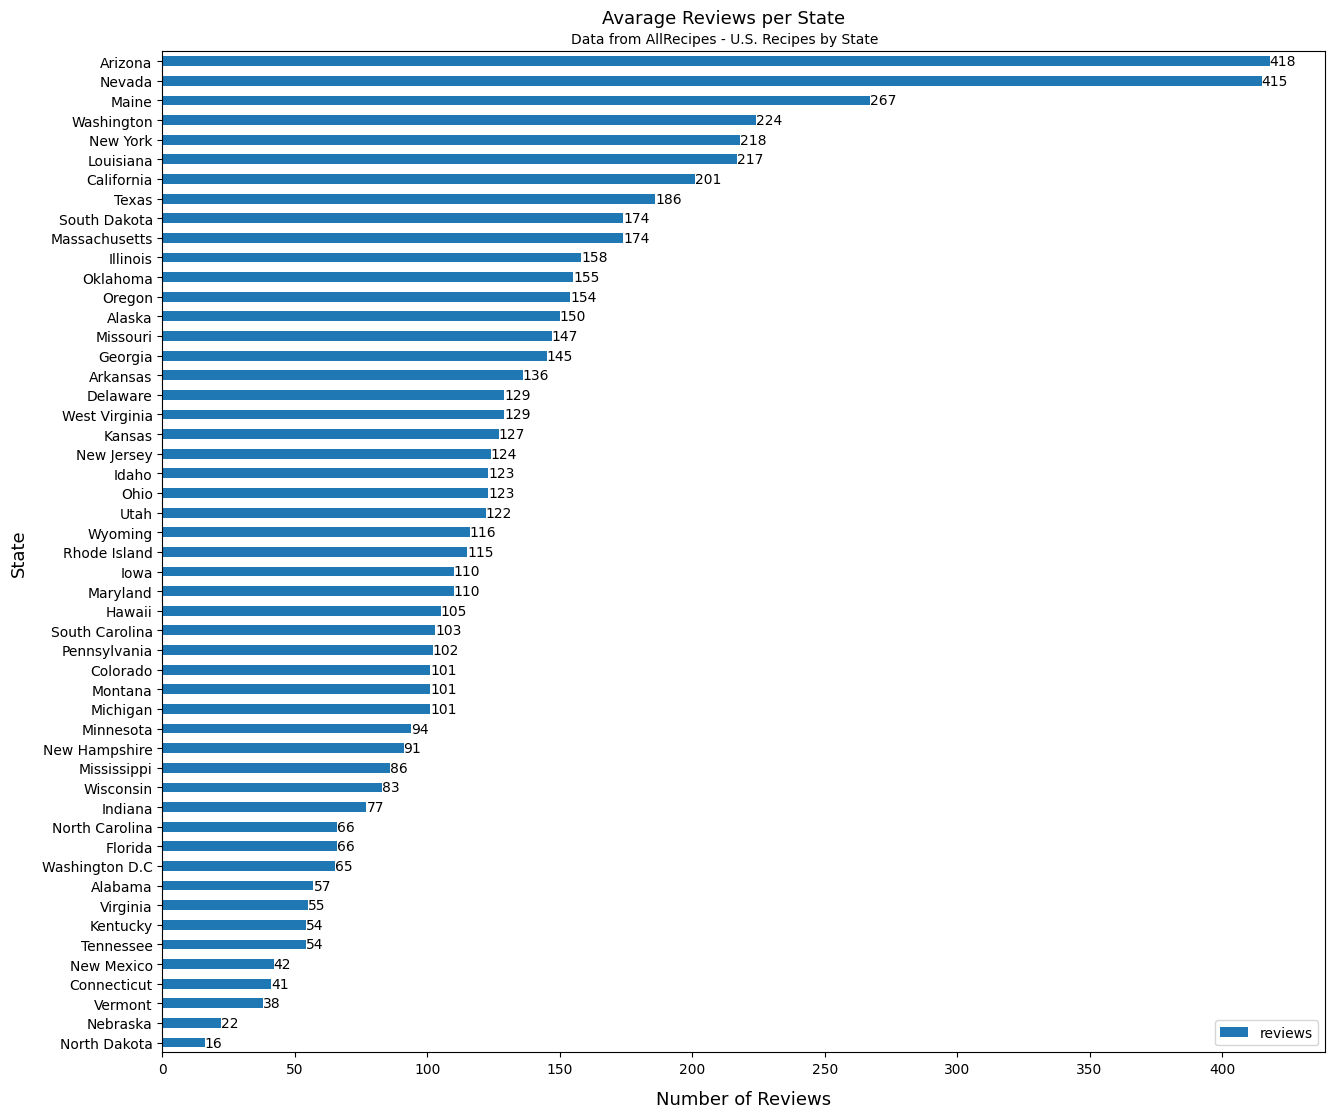

In [22]:
ax = (
    basic_info_subset_standartized_reviews_state.groupby('state')
    .mean(numeric_only=True)
    .round(0)
    .sort_values(by='reviews', ascending=True)
    .plot(kind='barh', figsize=(15, 13))
)

ax.bar_label(ax.containers[0])  # bar annotation

plt.title('Avarage Reviews per State', y=1.02, x=0.483, fontsize=13)
plt.suptitle('Data from AllRecipes - U.S. Recipes by State', y=0.895, fontsize=10)

plt.xlabel('Number of Reviews', labelpad=10, fontsize=13)
plt.ylabel('State', labelpad=10, fontsize=13)

plt.show()

What most reviewed dish each state have? ✅

In [23]:
most_loved_dish_subset = basic_info_subset_standartized[['state', 'title', 'reviews']]

most_loved_dish_subset.groupby(['state', 'title'], as_index=False)[
    'reviews'
].max().sort_values(by='reviews', ascending=False).head(10).style.hide(
    axis='index'
).background_gradient(
    cmap='Blues'
)

state,title,reviews
Maine,Downeast Maine Pumpkin Bread,7722
New York,Chantal's New York Cheesecake,5703
Washington,Grilled Salmon,3800
Nevada,Roast Sticky Chicken-Rotisserie Style,3488
Georgia,Fresh Southern Peach Cobbler,3112
Texas,Slow Cooker Texas Pulled Pork,2214
Minnesota,Creamy Chicken and Wild Rice Soup,2191
Louisiana,Colleen's Slow Cooker Jambalaya,2112
California,Fish Tacos,2088
Massachusetts,My Best Clam Chowder,1900


#### `prep_data` column

`prep_data` standardization

In [24]:
# https://github.com/wroberts/pytimeparse
# found after answer by wildwilhelm (creator of the package): https://stackoverflow.com/a/21498018/15164646

from pytimeparse.timeparse import timeparse
import datetime

prep_data_subset = recipes['prep_data']
prep_data_subset.to_frame()

prep_data_subset_df = []

NUM_SECONDS_IN_A_MIN = 60

#TODO: add state data
for result in prep_data_subset:
    # None or 0 means that data isn't provided on AllRecipes
    try:
        prep_time = round(datetime.timedelta(seconds=timeparse(result['prep_time:'])).total_seconds() / NUM_SECONDS_IN_A_MIN)  # minutes
    except: prep_time = 0
    
    try:
        cook_time = round(datetime.timedelta(seconds=timeparse(result['cook_time:'])).total_seconds() / NUM_SECONDS_IN_A_MIN)  # minutes
    except: cook_time = 0
    
    try:
        total_time = round(datetime.timedelta(seconds=timeparse(result['total_time:'])).total_seconds() / NUM_SECONDS_IN_A_MIN) # minutes
    except: total_time = 0
    
    try:
        servings = int(result['servings:'])
    except: servings = 0
    
    try:
        _yield = result['yield:']
    except: _yield = None
    
    prep_data_subset_df.append({
        'prep_time': prep_time,
        'cook_time': cook_time,
        'total_time': total_time,
        'servings': servings,
        'yield': _yield
    })

prep_data_subset_df = pd.DataFrame(data=prep_data_subset_df)

# even though if type cast to int explicitly from above results
# pandas still shows them as a float64, not sure why. That's why apply() + astype() used.
prep_data_subset_df[['prep_time', 'cook_time', 'total_time', 'servings']].apply(lambda x: x.astype('int'))
prep_data_subset_df.head()

,prep_time,cook_time,total_time,servings,yield
0,15,300,315,8,8 sandwiches
1,10,10,20,6,6 wedges
2,15,0,35,8,None
3,15,60,75,8,None
4,10,360,410,4,None


##### Concatinating two DataFrames `basic_info.category` and `prep_data`

In [25]:
#TODO: add state column
category_subset = avarage_category_review_rating['category']

prep_category_data_df = pd.concat([prep_data_subset_df, category_subset, state_df], axis=1, sort=False)
prep_category_data_df.head()

,prep_time,cook_time,total_time,servings,yield,category,state
0,15,300,315,8,8 sandwiches,Main Dishes,Texas
1,10,10,20,6,6 wedges,Side Dish,Texas
2,15,0,35,8,None,Appetizers and Snacks,Texas
3,15,60,75,8,None,Meat and Poultry,Texas
4,10,360,410,4,None,Main Dishes,Texas


##### FIY: Category placement aligns with the recipe cook times and servings

![image](https://user-images.githubusercontent.com/78694043/197383316-514e3e4f-0427-4bb1-92b0-212a18ddc1a9.png)

Avarage prep/cook/total time? ✅

- prep time = ~19.5 minutes
- cook time = ~56.6 minutes
- total time (prep + cook) = ~183.4 miuntes

In [26]:
prep_cook_total_time_data_df = prep_category_data_df[['prep_time', 'cook_time', 'total_time']].mean().round(1) # in minutes
prep_cook_total_time_data_df

prep_time      19.5
cook_time      56.6
total_time    183.4
dtype: float64

Avarage prep/cook/total time per category? ✅

📌Note

Didn't managed to properly sort from highest to lowest based on `total_time` when `plot()` `stacked=True`. When it `False`, everything plots as expected.


In [27]:
cat_prep_cook_total_df = prep_category_data_df[['category', 'prep_time', 'cook_time', 'total_time']]
cat_prep_cook_total_df

,category,prep_time,cook_time,total_time
0,Main Dishes,15,300,315
1,Side Dish,10,10,20
2,Appetizers and Snacks,15,0,35
3,Meat and Poultry,15,60,75
4,Main Dishes,10,360,410
...,...,...,...,...
1793,Drinks Recipes,10,0,105
1794,Meat and Poultry,15,11,86
1795,Desserts,5,10,135
1796,None,0,0,0


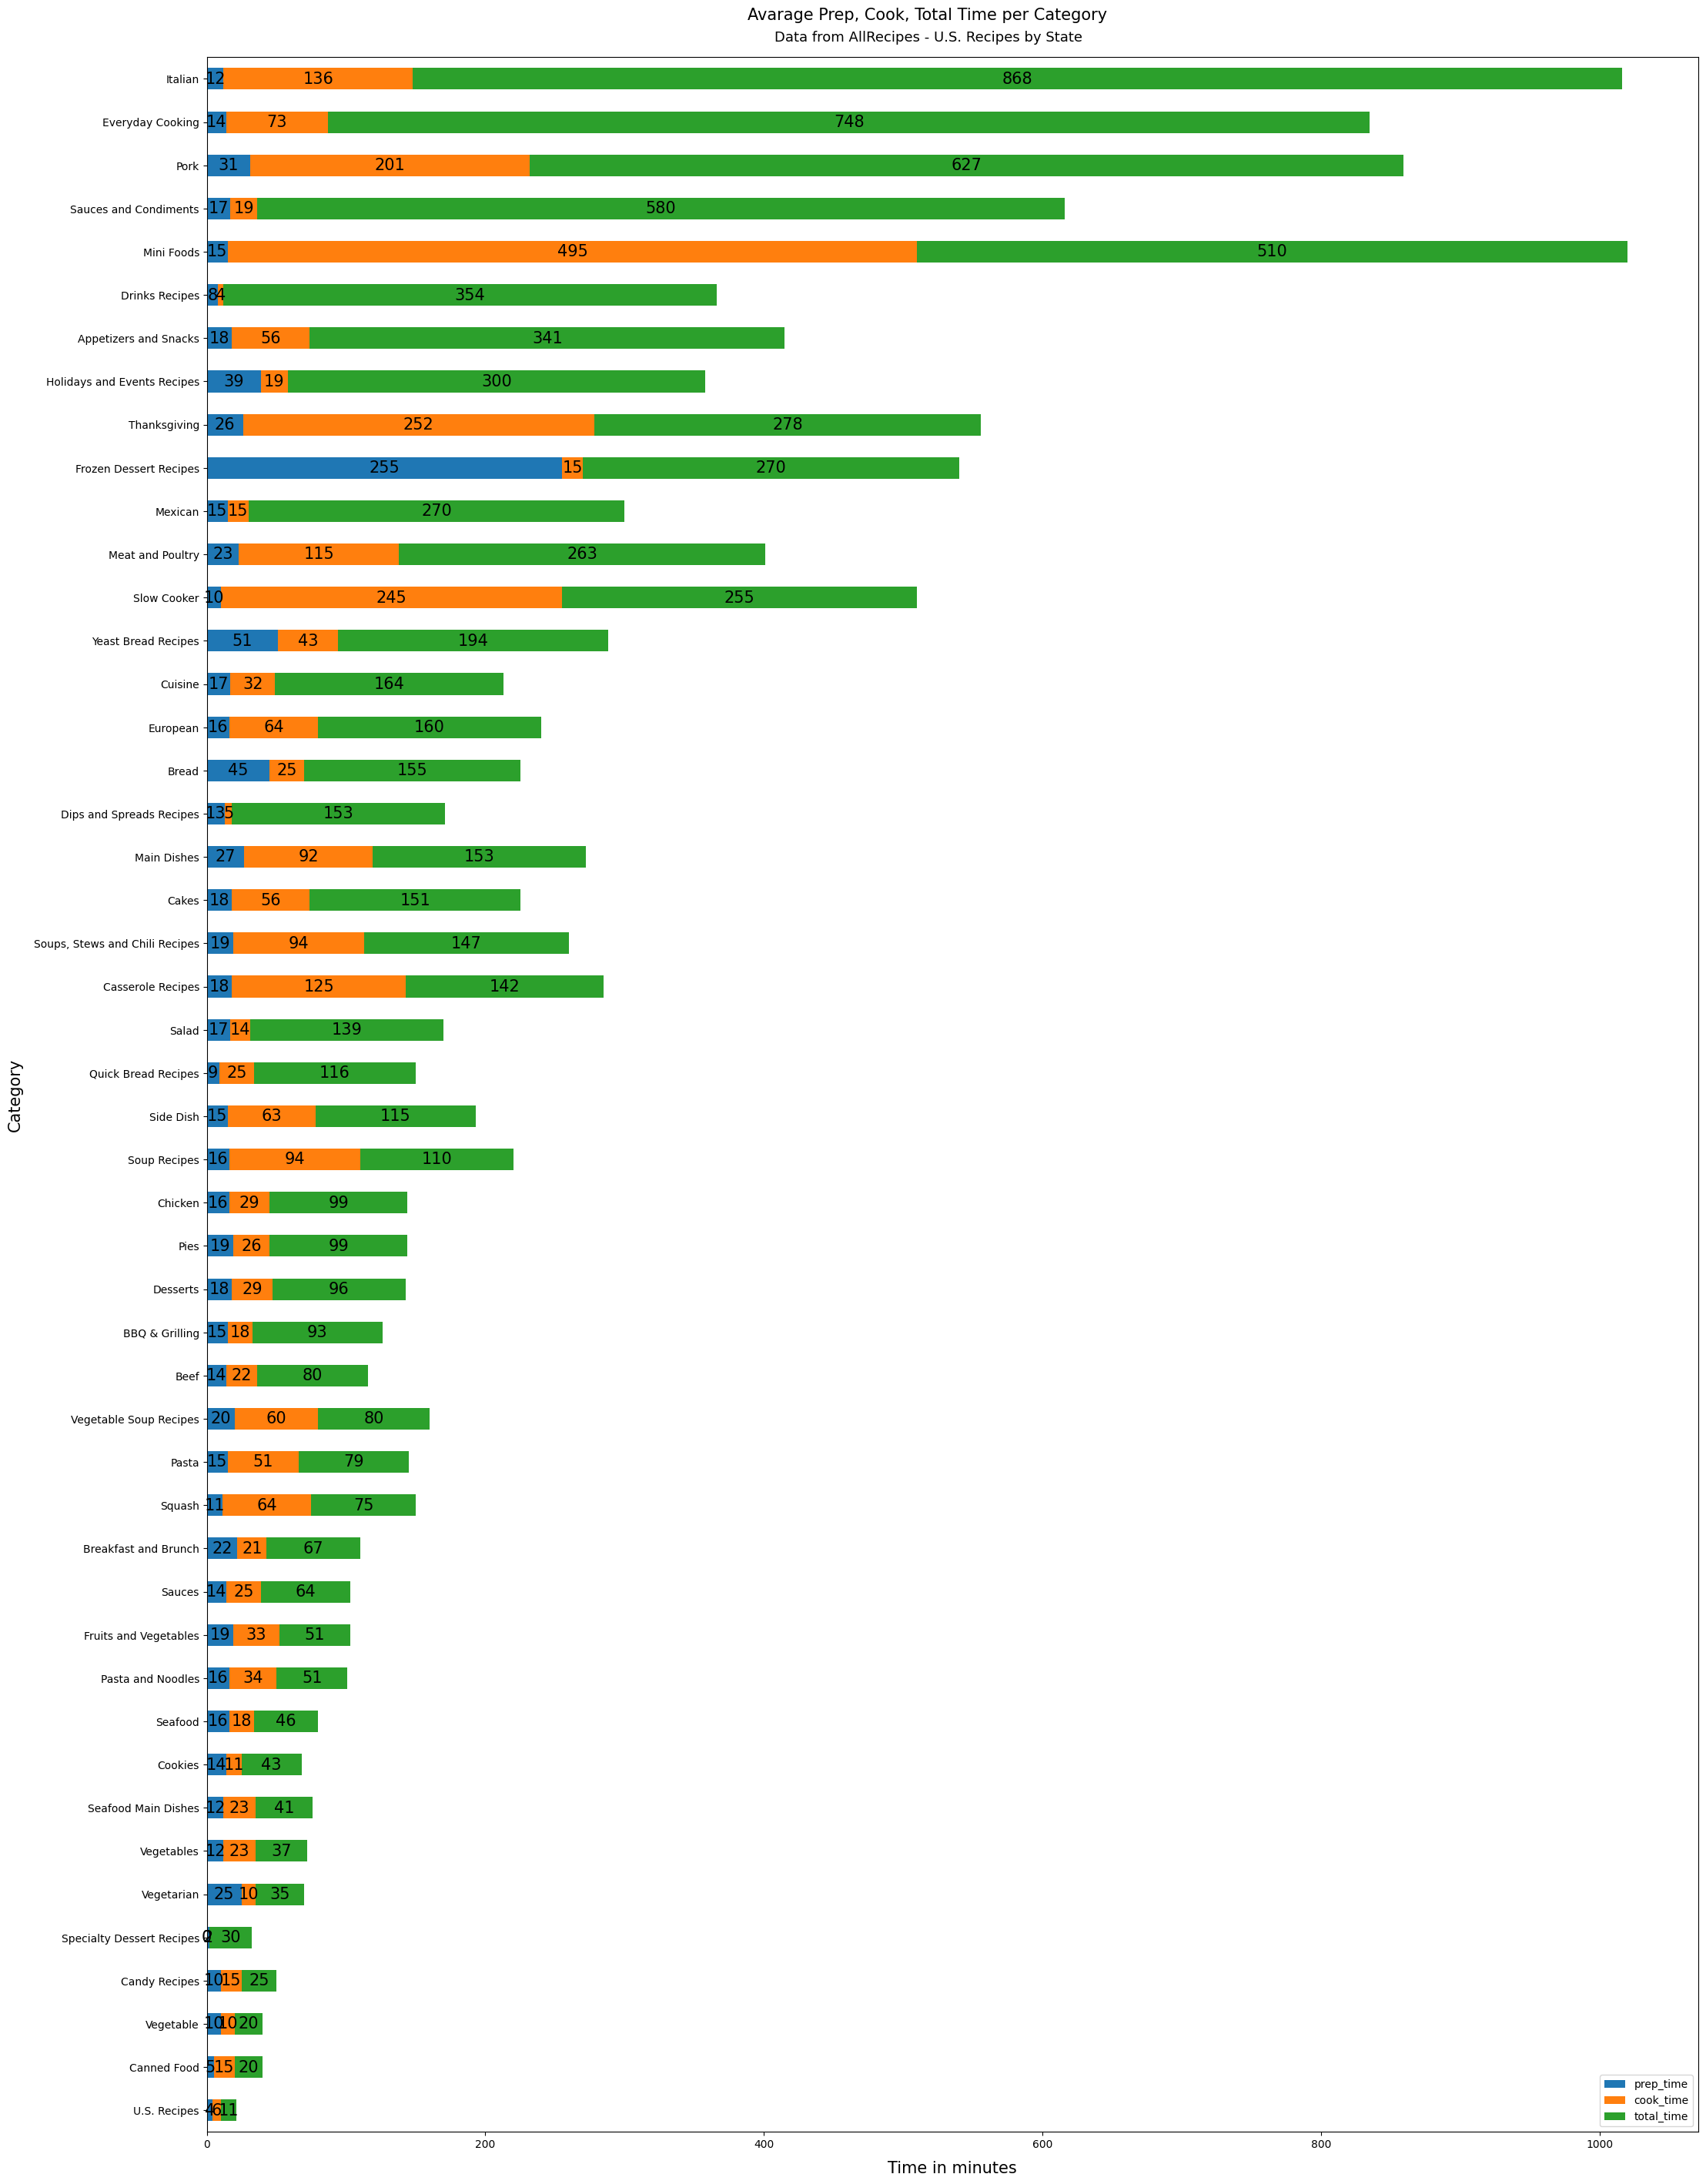

In [69]:
ax = (
    cat_prep_cook_total_df.groupby('category')
    .mean(numeric_only=True)
    .round(0)
    .sort_values(by='total_time', ascending=True)[5:]
    .plot(kind='barh', stacked=True, figsize=(25, 35))
)

for c in ax.containers:
    ax.bar_label(c, label_type='center', fontsize=15)

# ax.bar_label(ax.containers[0])  # bar annotation for prep time
# ax.bar_label(ax.containers[1])  # bar annotation for cook time
# ax.bar_label(ax.containers[2])  # bar annotation for total time

plt.title('Avarage Prep, Cook, Total Time per Category', y=1.015, x=0.483, fontsize=15)
plt.suptitle('Data from AllRecipes - U.S. Recipes by State', y=0.89, fontsize=13)

plt.xlabel('Time in minutes', labelpad=10, fontsize=15)
plt.ylabel('Category', labelpad=10, fontsize=15)

plt.show()

Which category has the most avarage servings per meal? ✅

Top 3:

- Cookies
- Sauces and condiments
- Everyday cooking

In [29]:
prep_servings_data_df = prep_category_data_df[['category', 'servings']]

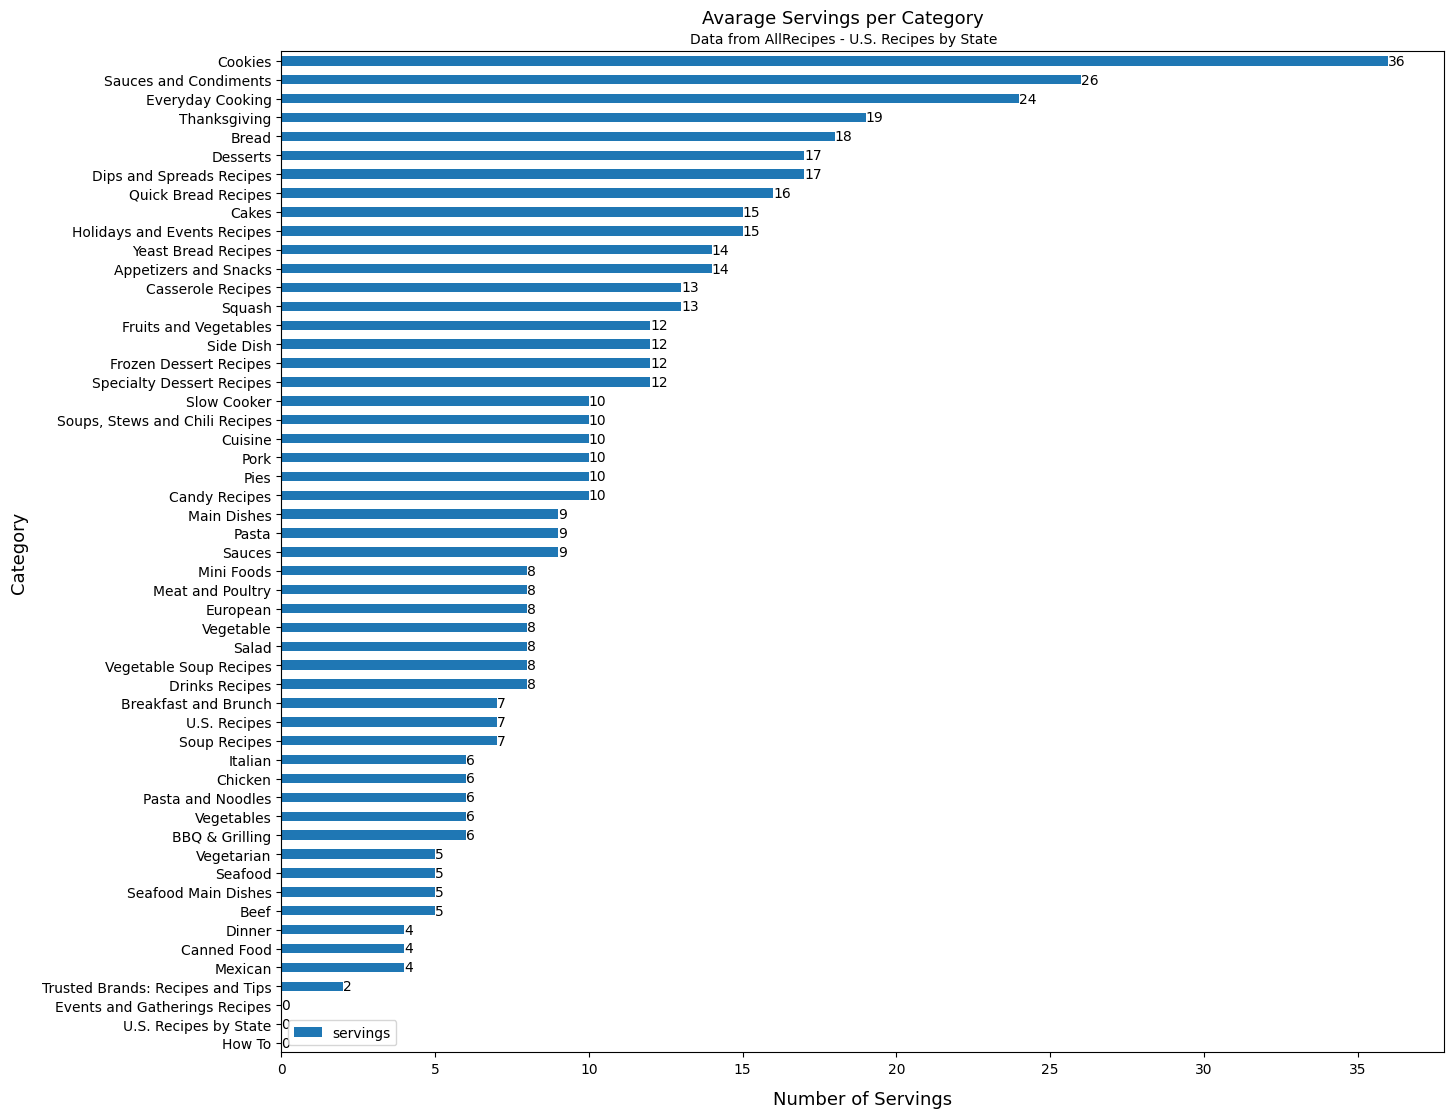

In [30]:
ax = (
    prep_servings_data_df.groupby('category')
    .mean(numeric_only=True)
    .round(0)
    .sort_values(by='servings', ascending=True)
    .plot(kind='barh', stacked=True, figsize=(15, 13))
)

ax.bar_label(ax.containers[0])  # bar annotation

plt.title('Avarage Servings per Category', y=1.02, x=0.483, fontsize=13)
plt.suptitle('Data from AllRecipes - U.S. Recipes by State', y=0.895, fontsize=10)

plt.xlabel('Number of Servings', labelpad=10, fontsize=13)
plt.ylabel('Category', labelpad=10, fontsize=13)

plt.show()

What is an avarage Prep/Cook time per State? ✅

Top 3 states with longest cook time:

- Wayoming: 159 min
- North Caroline: 145 min
- Montana: 127 min

In [31]:
prep_cook_state = prep_category_data_df[['state', 'prep_time', 'cook_time']]
prep_cook_state.head(5)

,state,prep_time,cook_time
0,Texas,15,300
1,Texas,10,10
2,Texas,15,0
3,Texas,15,60
4,Texas,10,360


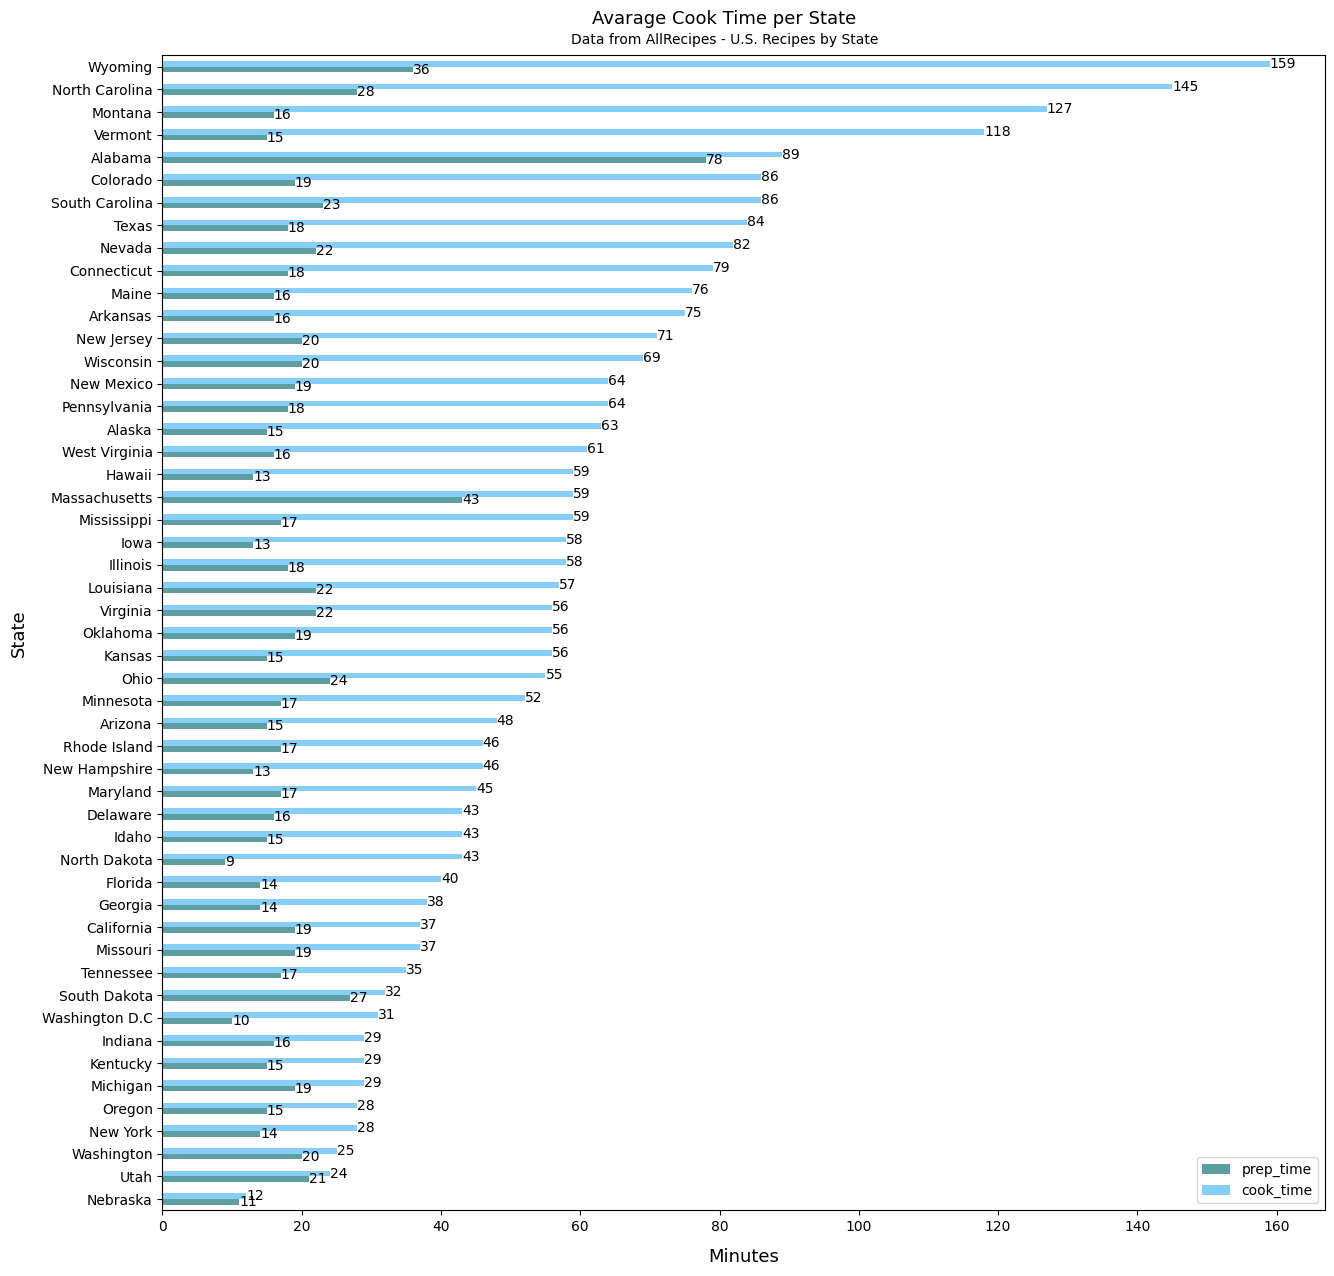

In [32]:
ax = (
    prep_cook_state.groupby('state')
    .mean(numeric_only=True)
    .round(0)
    .sort_values(by='cook_time', ascending=True)
    .plot(kind='barh', color=['cadetblue', 'lightskyblue'], figsize=(15, 15))
)

ax.bar_label(ax.containers[0])  # bar annotation
ax.bar_label(ax.containers[1])  # bar annotation

plt.title('Avarage Cook Time per State', y=1.02, x=0.483, fontsize=13)
plt.suptitle('Data from AllRecipes - U.S. Recipes by State', y=0.895, fontsize=10)

plt.xlabel('Minutes', labelpad=10, fontsize=13)
plt.ylabel('State', labelpad=10, fontsize=13)

plt.show()

What is an avarage Servings per State? ✅

Top 3:

- Nebraska: 33
- Kansas: 21
- North Dakota: 20

In [33]:
servings_state = prep_category_data_df[['state', 'servings']]
servings_state.head()

,state,servings
0,Texas,8
1,Texas,6
2,Texas,8
3,Texas,8
4,Texas,4


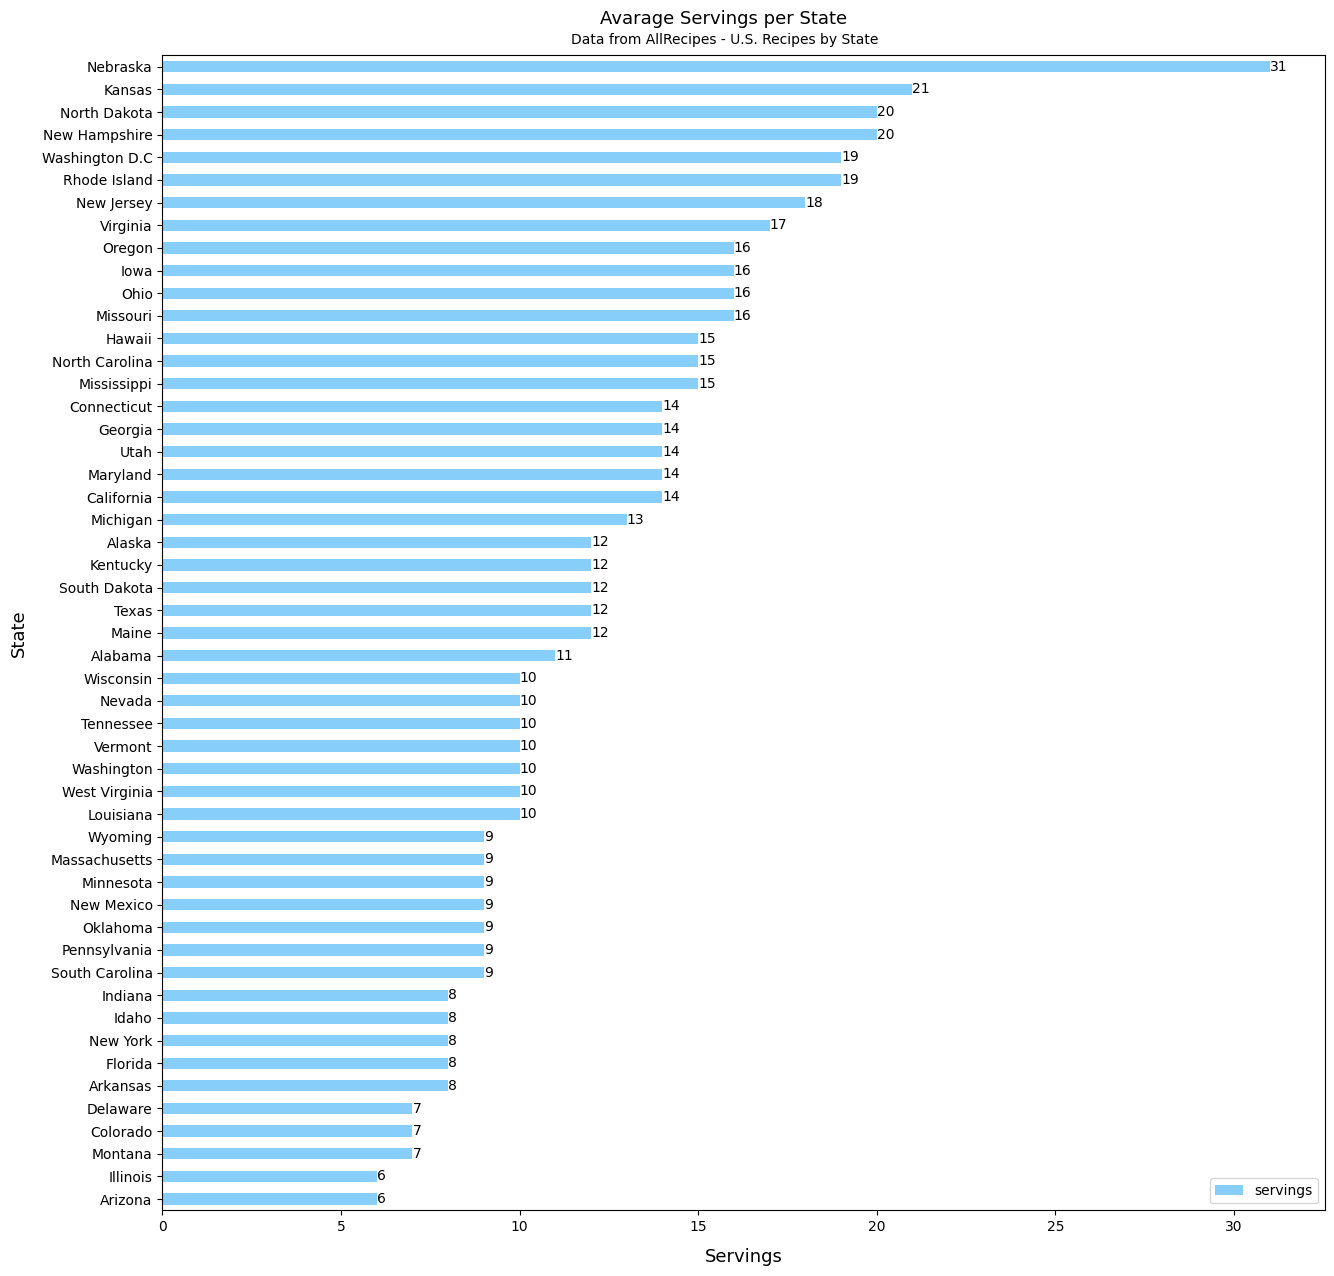

In [34]:
ax = (
    servings_state.groupby('state')
    .mean(numeric_only=True)
    .round(0)
    .sort_values(by='servings', ascending=True)
    .plot(kind='barh', color='lightskyblue', figsize=(15, 15))
)

ax.bar_label(ax.containers[0])  # bar annotation

plt.title('Avarage Servings per State', y=1.02, x=0.483, fontsize=13)
plt.suptitle('Data from AllRecipes - U.S. Recipes by State', y=0.895, fontsize=10)

plt.xlabel('Servings', labelpad=10, fontsize=13)
plt.ylabel('State', labelpad=10, fontsize=13)

plt.show()

#TODO: mention that nebraska has 8 dishes and most of them are cookies or burgers with a lot of servings.

`ingridients` column

What is the most common ingidients across all recipes? Top 3-5-10 ingidients. ⛔

Hard to filter all non-food words.

In [35]:
import re, itertools
# basic_info_subset_standartized to get state

ingridients_subset = recipes['ingridients']
ingridients_subset.to_frame()

ingridients = []

for ingridient in ingridients_subset:
    ingridients.append(','.join(ingridient))

ingridients_fixed = []

for item in ingridients:
    words = item.split(' ')
    ingridients_fixed.extend(words)

# https://regex101.com/r/0SdFvq/1
pattern = re.compile(r'\b(?:taste|to|or|teaspoon|cub|sauce|cup|brown|preserves|Worcestershire|cups|ounce|ounces|and|yellow|ground|pound|small|bell|red|green|crumbs|chopped|diced|slices|tablespoons|white|leaves|dressing|island|thousand|thousands|split|rolls|rings|style|marinade|inch|to|pounded|halves|breast|Hawaiian|cored|cut|into|spears|peeled|-|skinless|boneless|fresh|simple|can|juice|cold|quart|bags|bag|tea|cooked|Heinz®|as|such|sliced|chuck|drained|ounce|ounces|flaked|imitation|package|softened|packages|needed|for|frying|wooden|on|skewers|tail|left|right|deveined|large|medium|extra|pounds|tablespoon|minced|finely|seasoning|sea|Optional|optional|grated|teaspoon|teaspoons|seeds|toasted|seeded|Maui|cubes|ahi|steaks|pieces|torn|roasted|seasoned|Calrose|grain|SPAM®|canned|low|high|sodium|cans|can|meat|luncheon|lite|garnish|iceberd|flakes|crushed|crumbled|lightly|1\/2|size|serving|undrained|uncooked|halved|pitted|black|shoulder|cubed|cube|vegetable|sweetened|condensed|topping|whipped|frozen|container|containers|thawed|pie|crust|baked|seedless|blanched|slivered|chunk|tidbits|reserved|Miracle|Whip|e\.g\.|e\.g|eg\.|eg|™|creamy|stalks|chow|mein|more|much|bite|sized|breasts|cooked|soup|of|sweet|seed|kosher|cayenne|shell|shells|unsalted|head|wedges|wedge|pinch|pinches|shredded|elbow|extract|baking|ripe|ulu|cut|in|half|bottle|bottles|barbecue|barbeque|har|hars|pudding|instant|mix|roast|cake|semi|light|prepared|root|golden|silver|bronze|hot|chile|broth|dried|wet|warm|heavy|freshly|thinly|moisture|graham|extra|drizzle|smoke|smoked|family|live|pickle|bay|strained|if|dusting|Korean|korean|zested|confectioners)\b')

words = []

for food_item in ingridients_fixed:
    word = re.sub(pattern, '', food_item)
    words.append(word)
    

# #TODO: Remove 's' ending in words: appleS -> apple       
series = pd.Series(data=words)
series.value_counts()

                28803
,1               1893
)                1497
½                 855
,2                809
                ...  
overnight,10        1
virgin),½           1
olives,2            1
chayote             1
egg,⅓               1
Length: 3786, dtype: int64

`nutritions` column

Data standartization

In [36]:
nutritions_subset = recipes['nutritions']
nutritions_subset.to_frame()

nutritions_subset_df = []

for nutrition in nutritions_subset:
    try:
        calories = nutrition['calories']
    except: calories = 0
    
    try:
        fat = nutrition['fat'].replace('g', '')
    except: fat = 0
    
    try:
        carbs = nutrition['carbs'].replace('g', '')
    except: carbs = 0
    
    try:
        protein = nutrition['protein'].replace('g', '')
    except: protein = 0

    nutritions_subset_df.append({
        'calories': int(calories),
        'fat': int(fat),
        'carbs': int(carbs),
        'protein': int(protein)
    })
    
nutritions_subset_df = pd.DataFrame(data=nutritions_subset_df)
nutritions_subset_df.head()

,calories,fat,carbs,protein
0,528,23,46,32
1,255,0,66,1
2,233,9,32,8
3,372,23,22,19
4,342,16,29,22


Avarage of Calories/Fat/Carbs/Protein/etc?✅

Answer:

- Calories: 348g
- Fat: 18g
- Carbs: 30g
- Protein: 16g

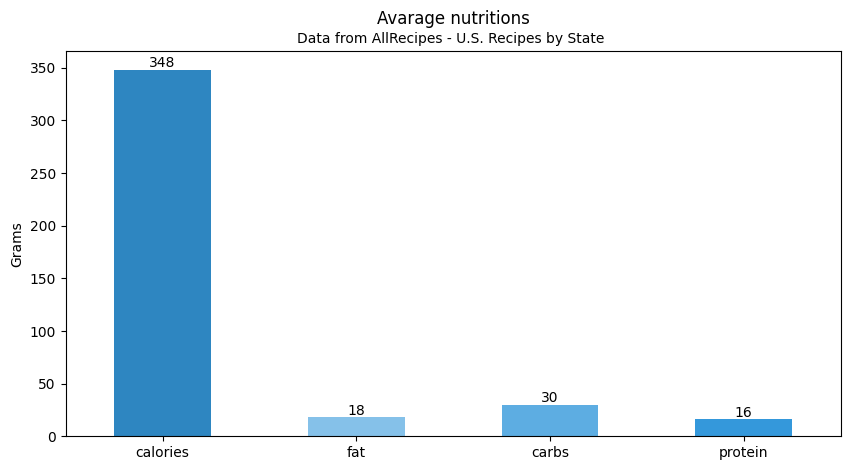

In [37]:
ax = (
    nutritions_subset_df.mean()
    .round()
    .astype('int')
    .plot(
        kind='bar',
        figsize=(10, 5),
        rot=0,
        color=['#2E86C1', '#85C1E9', '#5DADE2', '#3498DB'],
    )
)
ax.bar_label(ax.containers[0])

plt.title('Avarage nutritions', y=1.05)
plt.suptitle('Data from AllRecipes - U.S. Recipes by State', y=0.92, x=0.51, fontsize=10)
plt.ylabel('Grams')

plt.show()

Which category has the biggest of Calories/Fat/Carbs/Protein/etc? ✅

Answer:

- Calories: Everyday Cooking (2057g)
- Fat: Meat and Poultry (170g)
- Carbs: Mini Foods (177g)
- Protein: Seafood (118g)

📌Note: didn't manage to preserve order from lowest to highest because `pandas` drops rows where the category is `None`. Sorting afterward doesn't work as expected.

Without dropping NaN, sorting works as expected.

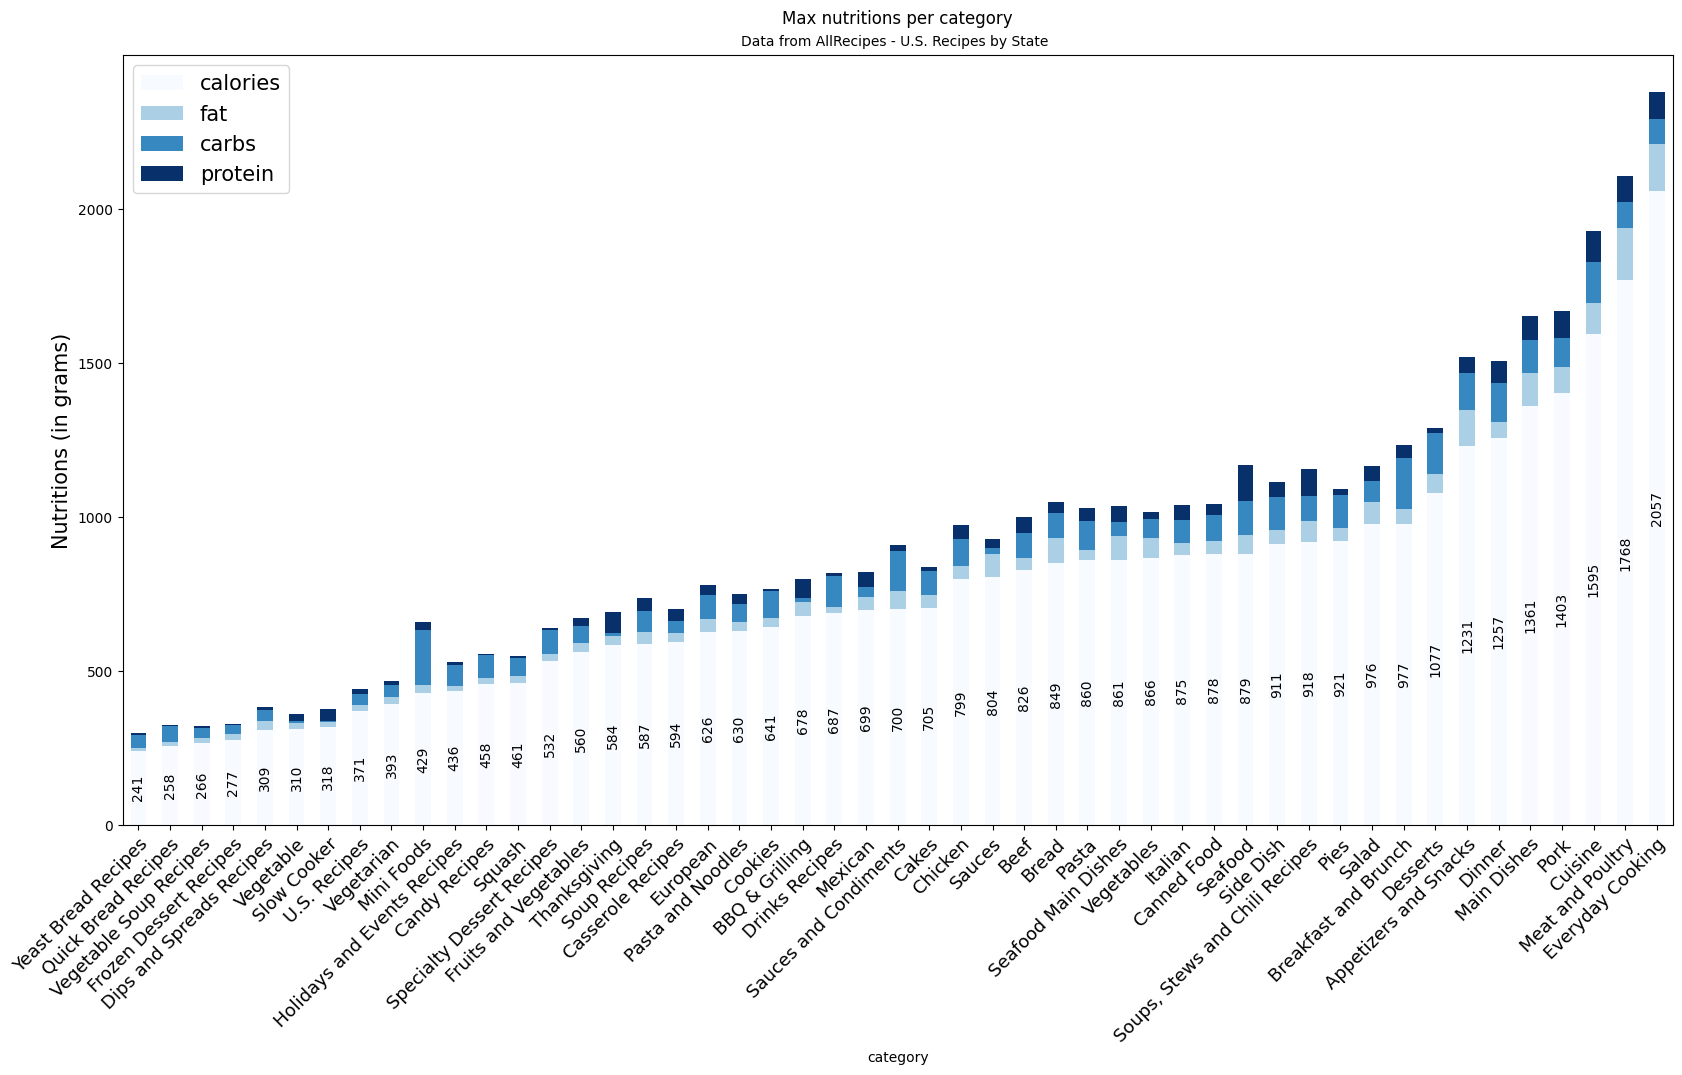

In [75]:
nutritions_title_state_category = basic_info_subset_standartized[
    ['state', 'title', 'category']
]

nutritions_category_subset = pd.concat(
    [nutritions_subset_df, nutritions_title_state_category['category']], axis=1
)

ax = nutritions_category_subset.groupby('category').max().sort_values(
    by=['calories', 'fat', 'carbs', 'protein'],
    ascending=[True, True, True, True],
    axis=0,
)[4:].plot(kind='bar', stacked=True, figsize=(20,10), cmap='Blues')

# for c in ax.containers:
#     ax.bar_label(c, label_type='center', fontsize=9, color='white')

ax.bar_label(ax.containers[0], label_type='center', fontsize=10, rotation=90)
# ax.bar_label(ax.containers[1], label_type='center', fontsize=7, color='black')
# ax.bar_label(ax.containers[2], label_type='center', fontsize=7, color='white')
# ax.bar_label(ax.containers[3], fontsize=8, padding=5)

plt.legend(prop={'size': 15})
plt.title('Max nutritions per category', y=1.03)
plt.suptitle('Data from AllRecipes - U.S. Recipes by State', y=0.90, x=0.511, fontsize=10)
plt.ylabel('Nutritions (in grams)', fontsize=15)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor', fontsize=13)

plt.show()

Example of selecting rows that are  `None`

In [39]:
for i in nutritions_category_subset[['calories', 'fat', 'carbs', 'protein']]:
    nutritions_category_subset[i] = sorted(nutritions_category_subset[i])

print(nutritions_category_subset[::-1])

      calories  fat  carbs  protein               category
1797      2057  170    177      118            Main Dishes
1796      1768  154    163      101                   None
1795      1595  117    133       92               Desserts
1794      1462  106    131       92       Meat and Poultry
1793      1453  100    130       92         Drinks Recipes
...        ...  ...    ...      ...                    ...
4            0    0      0        0            Main Dishes
3            0    0      0        0       Meat and Poultry
2            0    0      0        0  Appetizers and Snacks
1            0    0      0        0              Side Dish
0            0    0      0        0            Main Dishes

[1798 rows x 5 columns]


Example of selecting rows that are not `None`

In [40]:
nutritions_category_subset = nutritions_category_subset[pd.notnull(nutritions_category_subset['category'])]

nutritions_category_subset.sort_values(
    by=['calories', 'fat', 'carbs', 'protein'],
    ascending=[False, False, False, False],
).head(10)

,calories,fat,carbs,protein,category
1797,2057,170,177,118,Main Dishes
1795,1595,117,133,92,Desserts
1794,1462,106,131,92,Meat and Poultry
1793,1453,100,130,92,Drinks Recipes
1792,1403,99,127,88,Everyday Cooking
1791,1361,92,125,88,Meat and Poultry
1790,1257,88,118,85,Vegetarian
1789,1231,85,118,85,Desserts
1788,1220,84,118,82,"Soups, Stews and Chili Recipes"
1787,1196,81,113,80,Appetizers and Snacks


Which state has the biggest of Calories/Fat/Carbs/Protein/etc? ✅

Answer:

- Calories: Illinoins.

In [41]:
nutritions_state_subset = pd.concat([nutritions_subset_df, nutritions_title_state_category['state']], axis=1)
nutritions_state_subset

,calories,fat,carbs,protein,state
0,528,23,46,32,Texas
1,255,0,66,1,Texas
2,233,9,32,8,Texas
3,372,23,22,19,Texas
4,342,16,29,22,Texas
...,...,...,...,...,...
1793,152,0,39,1,Hawaii
1794,554,19,53,38,Hawaii
1795,52,4,4,0,Hawaii
1796,0,0,0,0,Hawaii


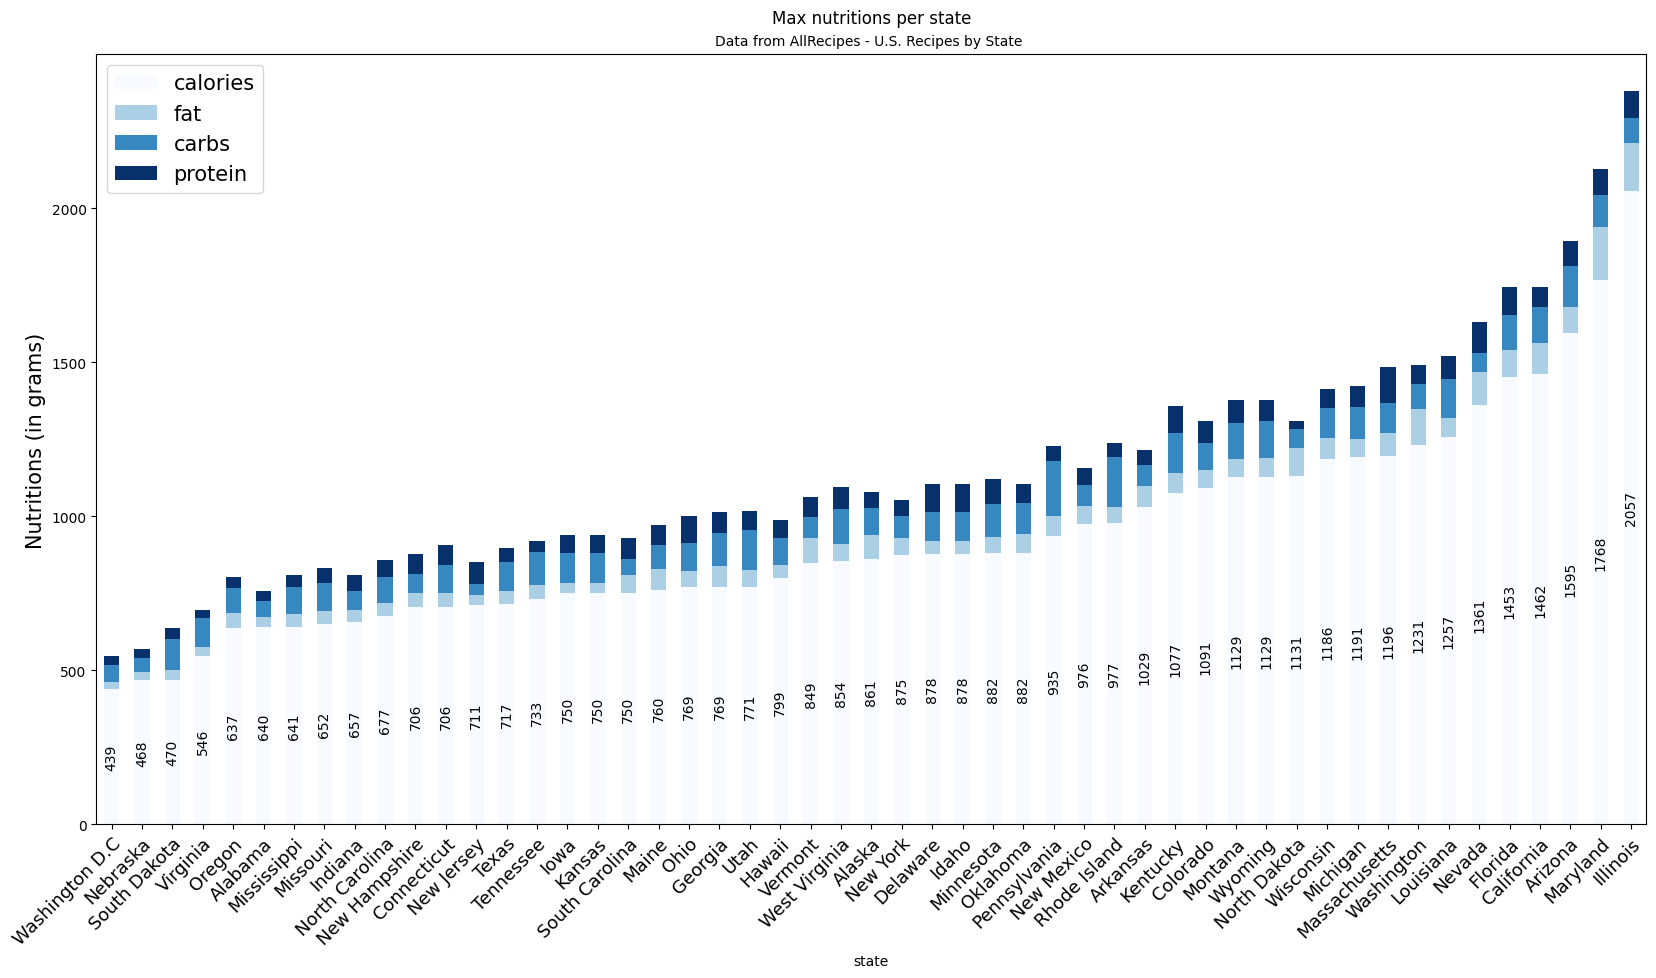

In [42]:
ax = nutritions_state_subset.groupby("state").max().sort_values(
    by=["calories", "fat", "carbs", "protein"], ascending=[True, True, True, True]
).plot(kind="bar", stacked=True, figsize=(20,10), cmap='Blues')

ax.bar_label(ax.containers[0], label_type='center', fontsize=10, rotation=90)

plt.legend(prop={'size': 15})
plt.title('Max nutritions per state', y=1.03)
plt.suptitle('Data from AllRecipes - U.S. Recipes by State', y=0.90, x=0.511, fontsize=10)
plt.ylabel('Nutritions (in grams)', fontsize=15)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor', fontsize=13)

plt.show()

# Didn't managed to sort.

# https://stackoverflow.com/a/69845103/15164646
# sorted_nutritions_state_subset = (
#     nutritions_state_subset.agg(
#         {
#             'calories': lambda x: x.sort_values(ascending=False).values,
#             'fat': lambda x: x.sort_values(ascending=False).values,
#             'carbs': lambda x: x.sort_values(ascending=False).values,
#             'protein': lambda x: x.sort_values(ascending=False).values,
#         }
#     )
#     .apply(pd.Series)
#     .transpose()
# )
# sorted_nutritions_state_subset

Combined Graph of Max calories per category and state

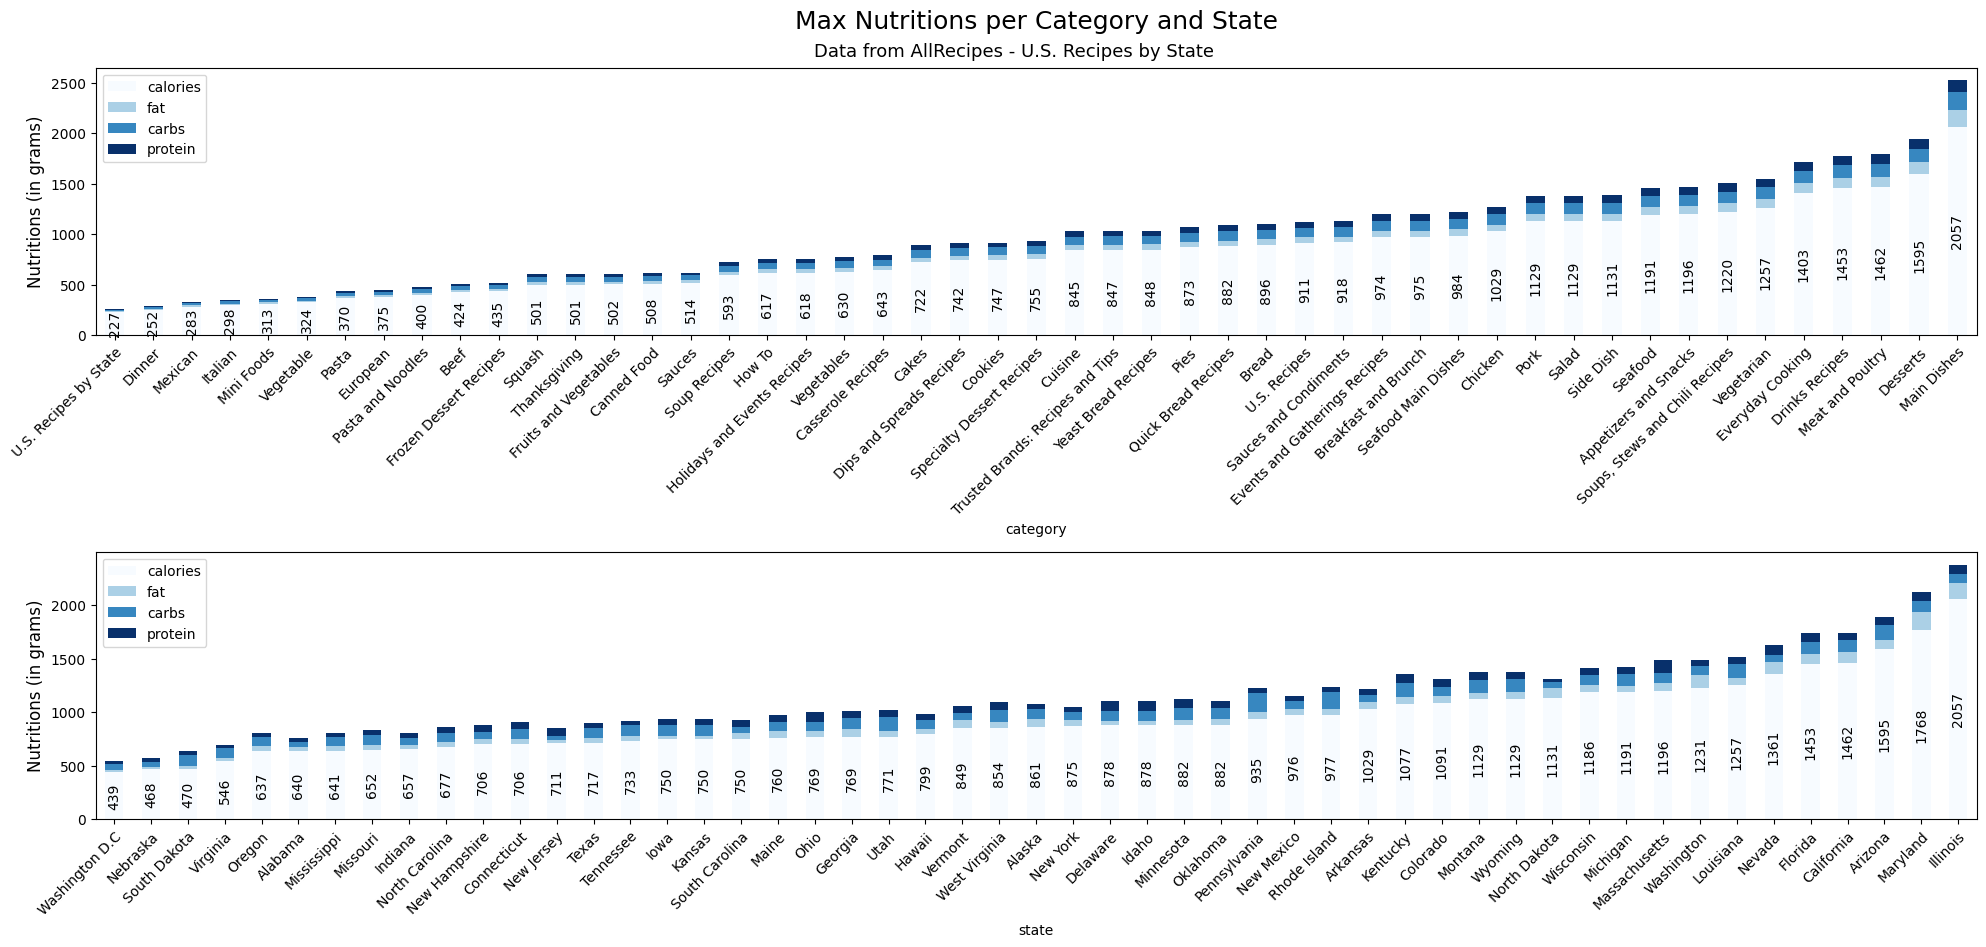

In [43]:
fig, ax = plt.subplots(2, 1, figsize=(20, 10))

ax1 = (
    nutritions_category_subset.groupby('category')
    .max()
    .sort_values(
        by=['calories', 'fat', 'carbs', 'protein'],
        ascending=[True, True, True, True],
        axis=0,
    )[4:]
    .plot(kind='bar', stacked=True, figsize=(20, 10), cmap='Blues', ax=ax[0])
)

ax1.bar_label(ax1.containers[0], label_type='center', fontsize=10, rotation=90)
ax1.set_title('Max Nutritions per Category and State', fontsize=18, y=1.115)
ax1.set_ylabel('Nutritions (in grams)', fontsize=12)

plt.setp(ax1.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor') # https://stackoverflow.com/a/68225861/15164646

ax2 = (
    nutritions_state_subset.groupby('state')
    .max()
    .sort_values(
        by=['calories', 'fat', 'carbs', 'protein'], ascending=[True, True, True, True]
    )
    .plot(kind='bar', stacked=True, figsize=(20, 10), cmap='Blues', ax=ax[1])
)

ax2.bar_label(ax2.containers[0], label_type='center', fontsize=10, rotation=90)
ax2.set_ylabel('Nutritions (in grams)', fontsize=12)

plt.suptitle('Data from AllRecipes - U.S. Recipes by State', y=0.91, x=0.511, fontsize=13)
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor') # https://stackoverflow.com/a/68225861/15164646

plt.tight_layout()
plt.show()

In [44]:
nutritions_title_subset = pd.concat([nutritions_subset_df, nutritions_title_state_category['title']], axis=1, sort=False)
nutritions_title_subset

,calories,fat,carbs,protein,title
0,528,23,46,32,Slow Cooker Texas Pulled Pork
1,255,0,66,1,Brazilian Grilled Pineapple
2,233,9,32,8,Cowboy Caviar
3,372,23,22,19,Soul Smothered Chicken
4,342,16,29,22,Slow Cooker Texas Smoked Beef Brisket
...,...,...,...,...,...
1793,152,0,39,1,Hawaiian Iced Tea
1794,554,19,53,38,Grilled Hawaiian Chicken and Pineapple Sandwiches
1795,52,4,4,0,Easy Haupia
1796,0,0,0,0,Luau Party


Which title has the biggest of Calories/Fat/Carbs/Protein/etc? ✅

Answer:

- Calories: Horseshoe (2057g)
- Fat: Mom's Old Fashioned Fried Chicken (42g)
- Carbs: Slow Cooker Philly-Style Shredded Beef Sliders (177g)
- Protein: Boiled Lobster (118g)

In [45]:
calories = nutritions_title_subset.query('calories == calories.max()')
fat = nutritions_title_subset.query('fat == fat.max()')
carbs = nutritions_title_subset.query('carbs == carbs.max()')
protein = nutritions_title_subset.query('protein == protein.max()')

print(calories)
print(fat)
print(carbs)
print(protein)

     calories  fat  carbs  protein      title
175      2057  154     81       88  Horseshoe
     calories  fat  carbs  protein                              title
737      1768  170     18       42  Mom's Old Fashioned Fried Chicken
     calories  fat  carbs  protein  \
884       429   27    177       27   

                                              title  
884  Slow Cooker Philly-Style Shredded Beef Sliders  
     calories  fat  carbs  protein           title
931       793    5     77      118  Boiled Lobster


Correlation between number of servings and number of reviews. ✅

Answer: no correlation.

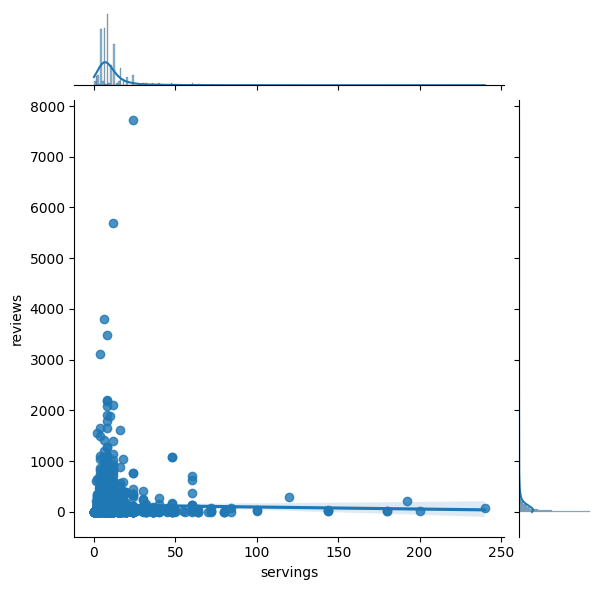

In [46]:
corr_servings_reviews = pd.concat([basic_info_subset_standartized['reviews'], servings_state['servings']], axis=1)
sns.jointplot(data=corr_servings_reviews, x='servings', y='reviews', kind='reg')

Correlation between total time and number of reviews. ✅

Answer: no correlation.

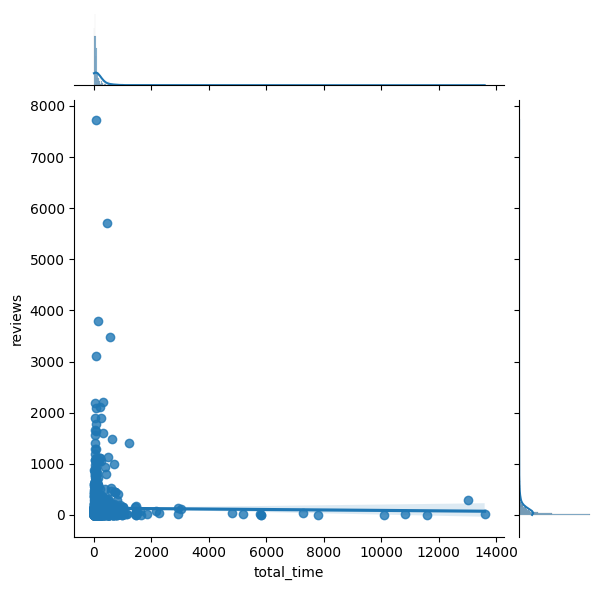

In [47]:
corr_total_time_reviews = pd.concat([prep_category_data_df['total_time'], basic_info_subset_standartized_df['reviews']], axis=1)
sns.jointplot(data=corr_total_time_reviews, x='total_time', y='reviews', kind='reg')

Correlation between calories and number of reviews. ✅

Answer: no correlation.

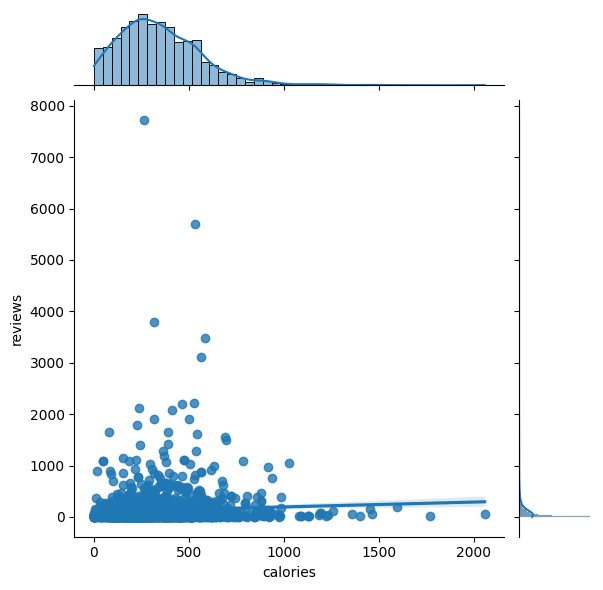

In [48]:
corr_calories_reviews = pd.concat([nutritions_subset_df['calories'], basic_info_subset_standartized_df['reviews']], axis=1)
sns.jointplot(data=corr_calories_reviews, x='calories', y='reviews', kind='reg')

Correlation between total cook time and number of servings. ✅

Answer: very slight correlation.

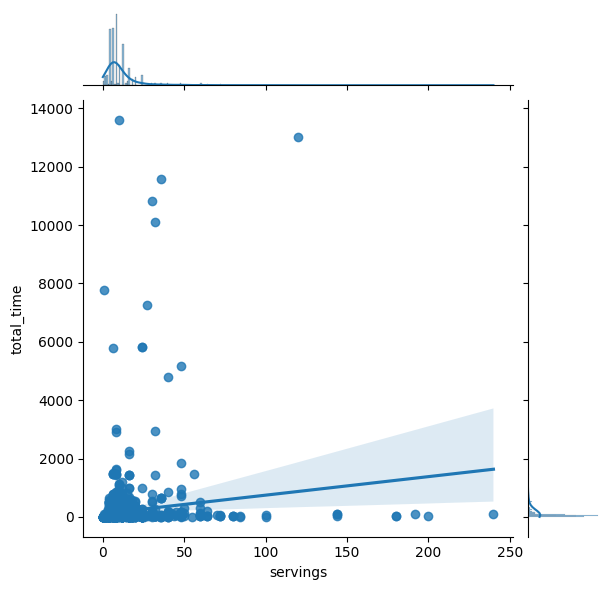

In [49]:
corr_total_time_servings = pd.concat([prep_category_data_df['total_time'], prep_category_data_df['servings']], axis=1)
sns.jointplot(data=corr_total_time_servings, x='servings', y='total_time', kind='reg')

Correlation between servings and calories. ✅

Answer: no correlation.

<AxesSubplot: xlabel='calories', ylabel='servings'>

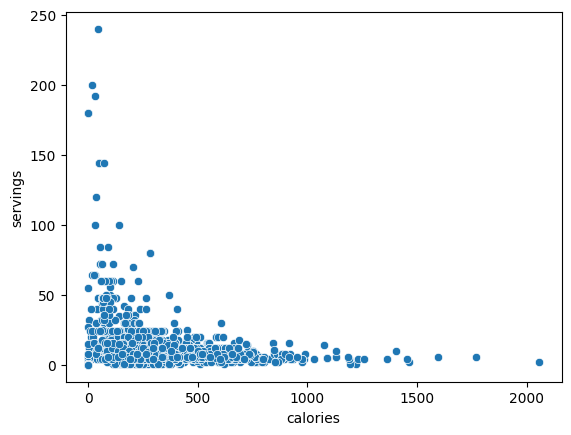

In [50]:
corr_servings_calories = pd.concat([prep_category_data_df['servings'], nutritions_subset_df['calories']], axis=1)
sns.scatterplot(data=corr_servings_calories, x='calories', y='servings')